# Description
## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Import libraries and read data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
import warnings
warnings.simplefilter('ignore')

pd.set_option('precision', 2)

## Read the data

In [2]:
cdf = pd.read_csv("Loan_Modelling.csv")

# Exploratory Data Analysis

## Read sample 5 records

In [3]:
#cust_data = df.drop('ID', axis=1 ) # dropping this column as it will be 1-1 mapping anyways
cdf.head() #Get the first five records from the dataframe

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Get datatype customer data

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Check Null values in data

In [5]:
cdf.isnull().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIPCode               5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal_Loan         5000
Securities_Account    5000
CD_Account            5000
Online                5000
CreditCard            5000
dtype: int64

## Check rows and columns in datafame

In [6]:
cdf.shape

(5000, 14)

## Observation on Dataset

- There are 14 attributes and 5000 records in total 
- No null values, missing values in the data
- Quantitative variables : 
    * Age
    * Experience
    * Income
    * CCAvg
    * Mortgage
- Categorical variables
    * Family
    * Education
    * ID
    * ZIPCode
    * Securities_Account
    * CD_Account
    * Online
    * CreditCard
    
- Quantitative variables can be declared as type float. Variables like ID, ZIP Code should be declared as str.

# Pre-processing of data

## Change datatype of few variables

In [7]:
# Quantitative variables can be declared as type float
#Variables like ID, ZIP Code should be declared as str

cdf[["Age","Experience","Income","CCAvg","Mortgage"]] = cdf[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)
cdf[['ID','ZIPCode']] = cdf[['ID','ZIPCode']].astype('str')

In [8]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null object
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIPCode               5000 non-null object
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(5), int64(7), object(2)
memory usage: 547.0+ KB


## Describe the dataframe

In [9]:
cdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


**Observation:** 
- Experience column has negative data which needs some correction
- Age is spread from 23 to 67

## Impute & analysis incorrect data

### Data cleansing : Experience in -ve number

In [10]:
# Get the count of negative values in Experience column
cdf[cdf['Experience'] < 0]['Experience'].count()

52

In [11]:
# Get sample data
sample = cdf[cdf['Experience'] < 0]['Experience']
sample.head()

89    -1.0
226   -1.0
315   -2.0
451   -2.0
524   -1.0
Name: Experience, dtype: float64

In [12]:
# Apply absolute value to -ve experience
cdf["Experience"] = cdf["Experience"].apply(abs)

In [13]:
# After cleansing -ve experience , describe data 
cdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.13,11.42,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


## Univariate Analysis

In [14]:
sns.set(rc={'figure.figsize':(14,12)})

### Histogram plot for Mortgage , Experience  and Income

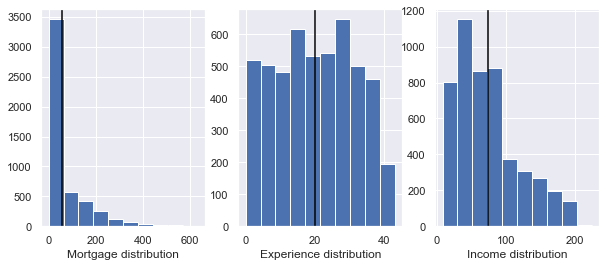

In [15]:
# Histogram Plot of Quantitative Data

fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (10,4))

ax0.hist(cdf.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(cdf.Mortgage.mean(), color = "black")

ax1.hist(cdf.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(cdf.Experience.mean(), color = "black");

ax2.hist(cdf.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(cdf.Income.mean(), color = "black");

**Histogram Observation** : Mortgage and income seems right skewed

### Continous plot

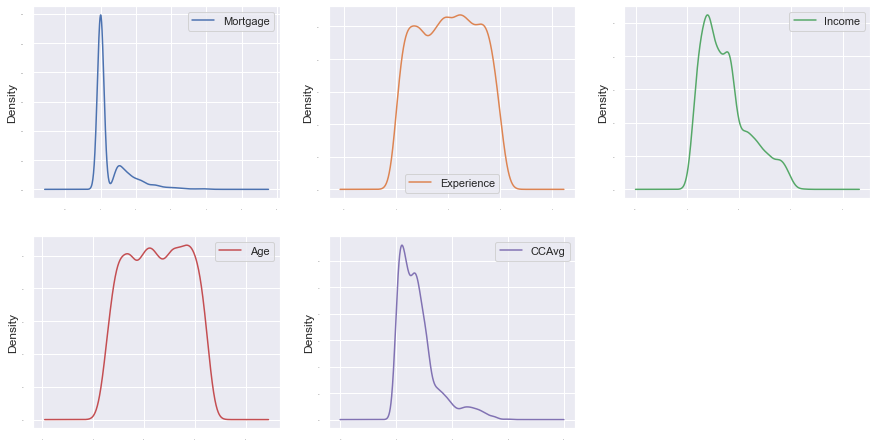

In [16]:
# Continous plot for quantitative variables

q_cdf = cdf[['Mortgage','Experience','Income', 'Age', 'CCAvg']]

q_cdf.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

### Box plot

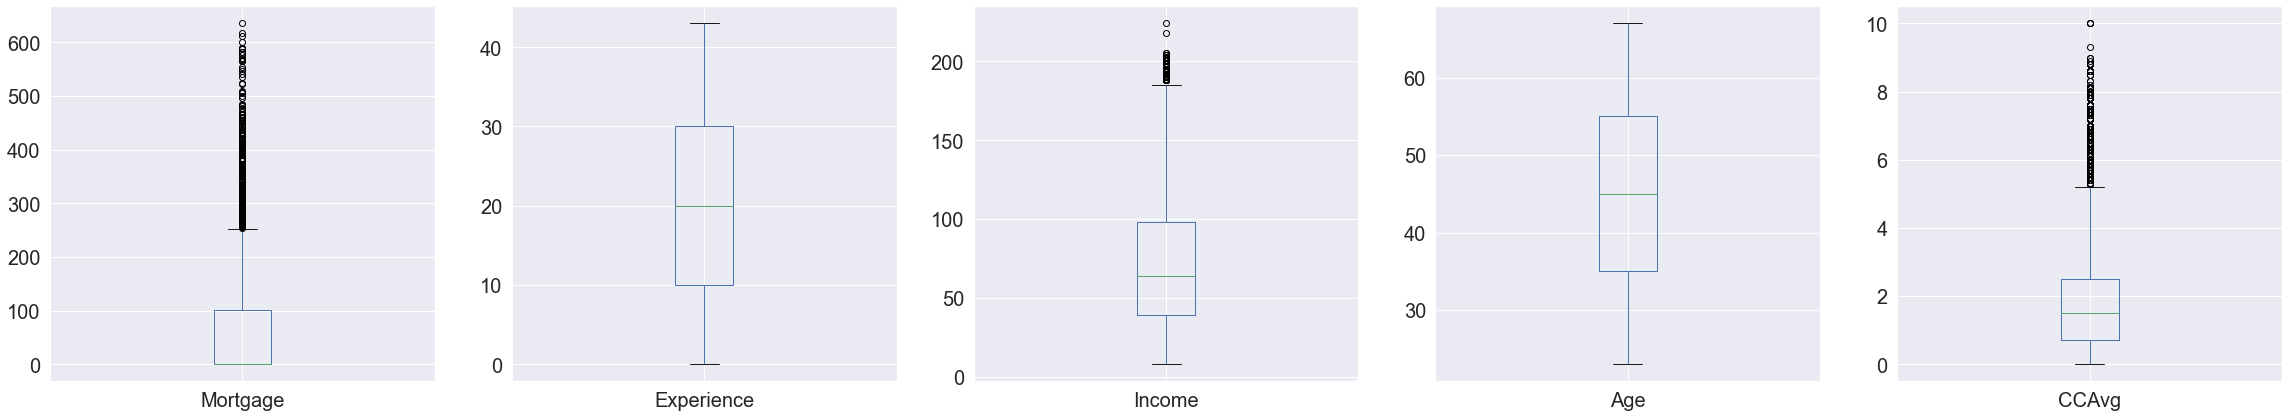

In [17]:
q_cdf.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))
plt.show()

### Histogram plat for age , ccavg, experience, income,mortgage

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CCAvg'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>, <AxesSubplot:>]],
      dtype=object)

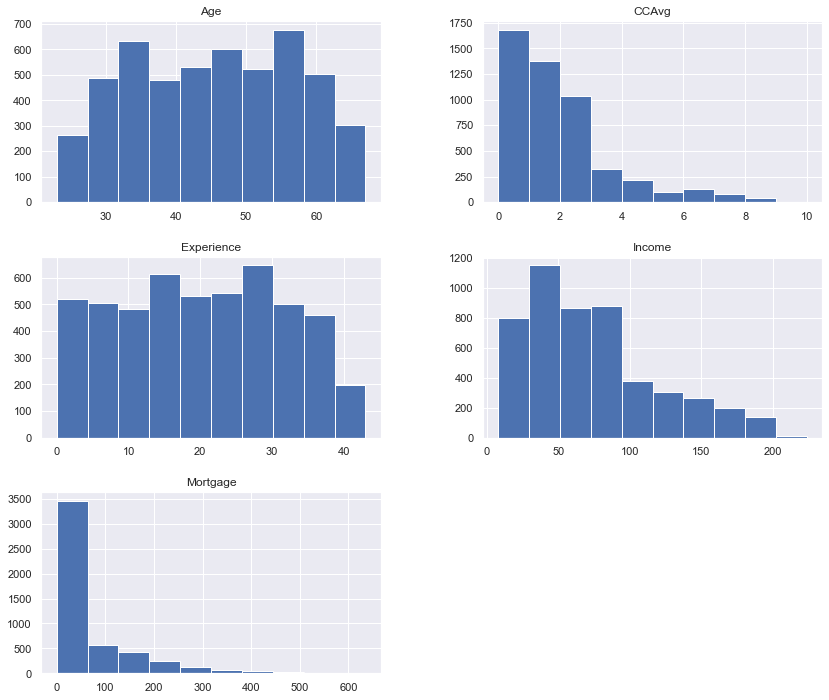

In [18]:
q_cdf.hist()

### Observation of uni-variate analysis

**Observation:**
 * Mortgage , CCAvg and Income are right skeweed
 * Experience is evenly distributed after fixing the negative values
 * Age is also evenly distrbuted
 * Mortagage re concenrated between 1000 to 2000
 * Experience is spread from 0 to 40
 * Income is concenrated between 0 to 100k

## Bi-variate and Multi-variate analysis

In [19]:
bm_cdf = cdf

### Create Experience range

In [20]:
def f(row):
    if row['Experience'] < 10.0:
        val = 'exp < 10'
    elif row['Experience'] > 10.0 and row['Experience'] < 20.0:
        val = '10 < exp < 20'
    elif row['Experience'] > 20.0 and row['Experience'] < 30.0:
        val = '20 < exp < 30'
    else:
        val = 'exp > 30'
    return val

In [21]:
bm_cdf['experience_range'] = bm_cdf.apply(f, axis=1)

### Box plot on experience range and income

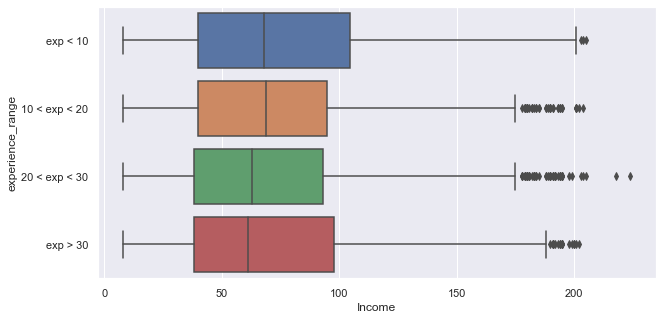

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Income", y="experience_range", data=bm_cdf);

### Create Age range


In [23]:
def f(row):
    if row['Age'] < 30.0:
        val = 'age < 30'
    elif row['Age'] > 30.0 and row['Age'] < 45.0:
        val = '30 < age < 45'
    elif row['Age'] > 45.0 and row['Age'] < 60.0:
        val = '45 < age < 60'
    else:
        val = 'age > 60'
    return val

In [24]:
bm_cdf['age_range'] = bm_cdf.apply(f, axis=1)

### Box plot on age range and income

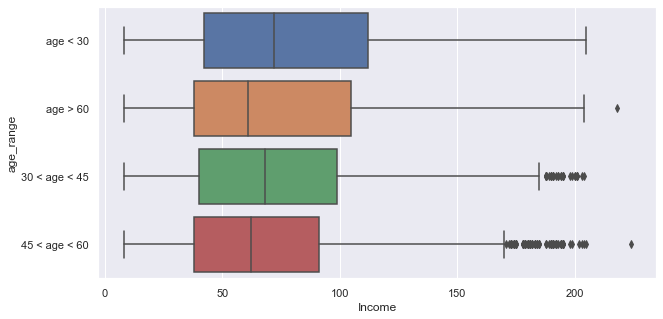

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Income", y="age_range", data=bm_cdf);

### Create Income range

In [26]:
def f(row):
    if row['Income'] < 100.0:
        val = 'income < 100k'
    elif row['Income'] > 100.0 and row['Income'] < 200.0:
        val = '100k < income < 200k'
    else:
        val = 'income > 200k'
    return val

In [27]:
bm_cdf['income_range'] = bm_cdf.apply(f, axis=1)

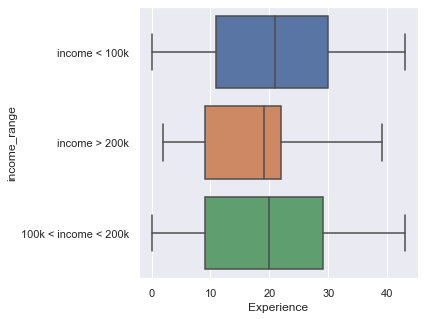

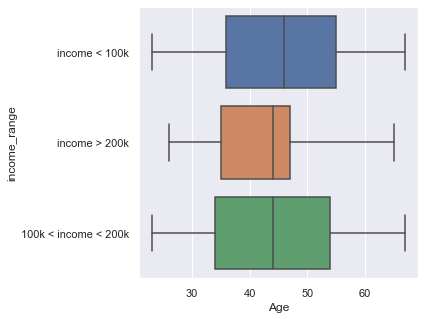

In [28]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Experience", y="income_range", data=bm_cdf);
plt.figure(figsize=(5, 5))
sns.boxplot(x="Age", y="income_range", data=bm_cdf);

### Observation : Box plot 
- Box plots Income range vs Age and Income range vs Age seems similar
- It also shows age and experience has nothing to do with income. 
- It might happen a person with age 45 might earn less than a person with age less than 35

### Relationship between Experience and quantitative variables

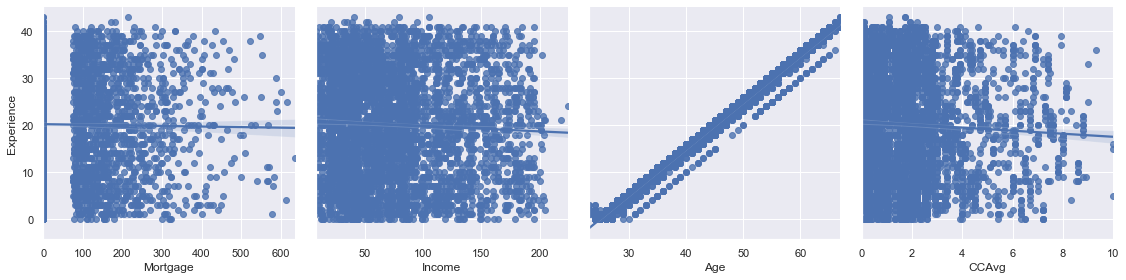

In [29]:
cols = cdf[['Mortgage','Income', 'Age', 'CCAvg']]
grid = sns.PairGrid(cdf, y_vars = 'Experience', x_vars = cols, height = 4)
grid.map(sns.regplot);

**Observation:** It is seen that Age has a strong positive association with Experience. 


### Pairplot with all variables

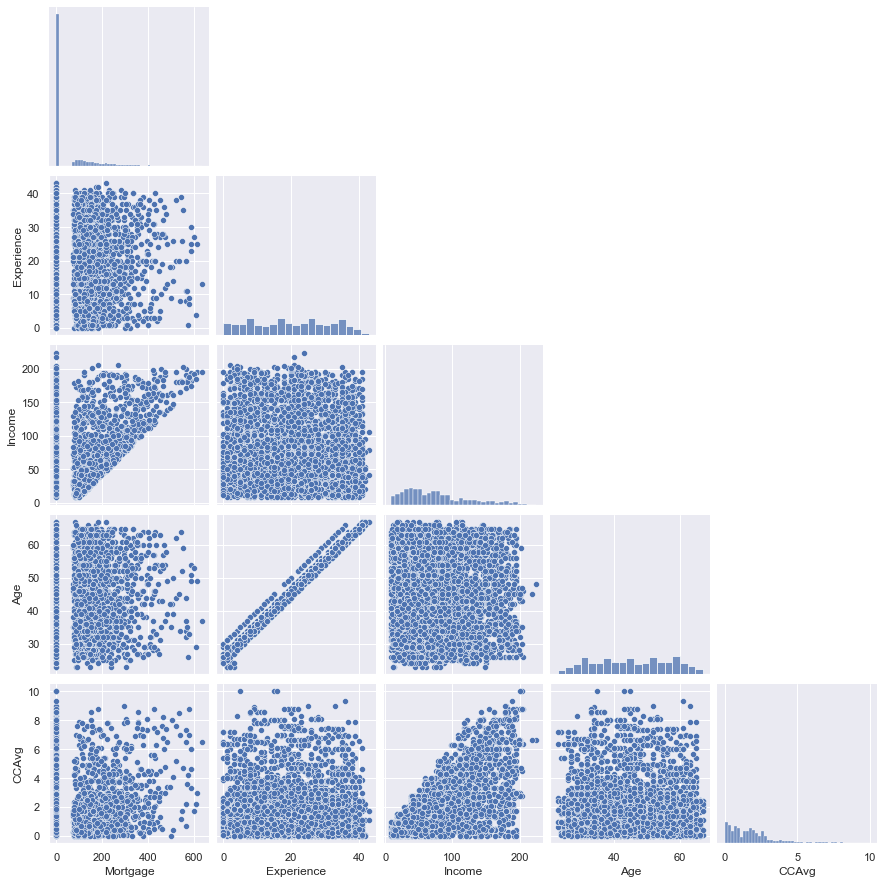

In [30]:
# Scatter plot matrix (Pairplot for all variables)
sns.pairplot(q_cdf,corner=True)
plt.show()

### Observations : Pair plot / scatter plot

 * Age is normally distributed with majority of customers falling between 30 years and 60 years of age.
 * Experience is normally distributed with more customer having experience starting from 8 years.
 * Income is positively skewed. Majority of the customers have income between 45K and 55K.
 * CCAvg is also a positively skewed variable

## Heatmap correlation

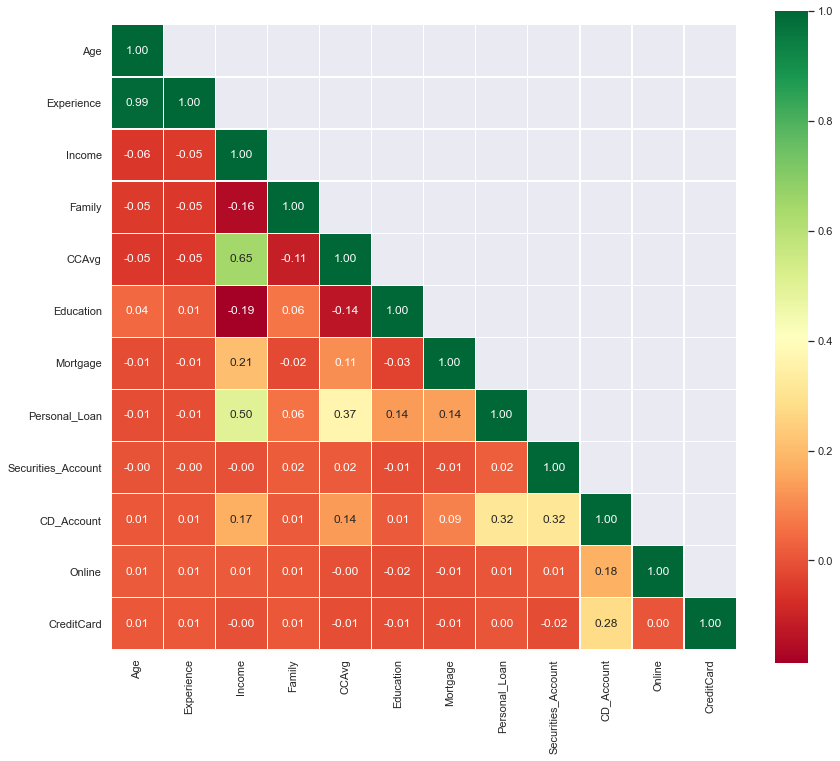

In [31]:
corr = cdf.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr,mask=mask,annot=True, square=True,fmt='.2f',cmap='RdYlGn', linewidths=0.2)
plt.show()

### Observation from Heatmap
 * Income and CCAvg is moderately correlated (0.65)
 * Age and Experience is highly correlated (0.99)
 * Income, CCAvg have positive association with Personal_Loan
 * Family and income , Education and income are very low correlated

## Cross Tab Observation

### Relationship between age range and experience range

In [32]:
pd.crosstab(bm_cdf['age_range'],cdf['experience_range'] , margins=True, margins_name="Total")

experience_range,10 < exp < 20,20 < exp < 30,exp < 10,exp > 30,Total
age_range,,,,,
30 < age < 45,1046,0,547,175,1768
45 < age < 60,9,1132,0,666,1807
age < 30,0,0,488,0,488
age > 60,50,43,136,708,937
Total,1105,1175,1171,1549,5000


### Relationship between age range and income range

In [33]:
pd.crosstab(bm_cdf['age_range'],cdf['income_range'] , margins=True, margins_name="Total")

income_range,100k < income < 200k,income < 100k,income > 200k,Total
age_range,,,,
30 < age < 45,426,1330,12,1768
45 < age < 60,372,1427,8,1807
age < 30,150,336,2,488
age > 60,245,685,7,937
Total,1193,3778,29,5000


### Relationship between experience range and experience range

In [34]:
pd.crosstab(bm_cdf['experience_range'],cdf['income_range'] , margins=True, margins_name="Total")

income_range,100k < income < 200k,income < 100k,income > 200k,Total
experience_range,,,,
10 < exp < 20,255,843,7,1105
20 < exp < 30,256,913,6,1175
exp < 10,316,847,8,1171
exp > 30,366,1175,8,1549
Total,1193,3778,29,5000


### Observation from Crosstab analysis
- It shows 2 people with age less than 30 earning more than 200k per annum
- There are more people (12) between 30 and 45 earning more than 200k per annum
- Strangely, there are more people (1175) with experience more than 30 years earning less than 100k 
- It also shows experience and age have direct corelation with income earned per annum

## Personal Loan : Target Column Distribution

In [35]:
source_counts =pd.DataFrame(cdf["Personal_Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal_Loan"]
source_counts

,Labels,Personal_Loan
0,0,4520
1,1,480


### Pie chart : Personal loan 

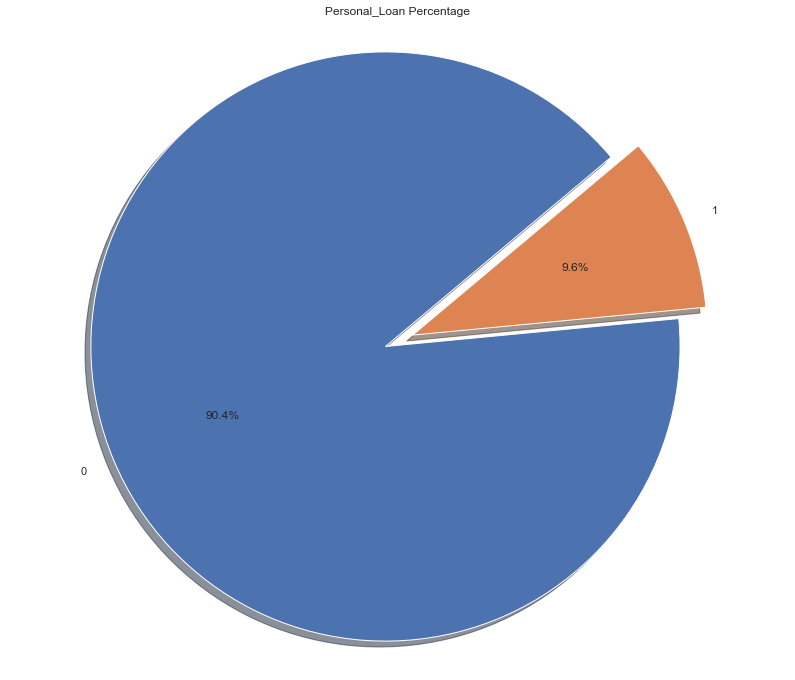

In [36]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(source_counts["Personal_Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=40)
ax1.axis('equal') 
plt.title("Personal_Loan Percentage")
plt.show()

### Personal loan : Bivariate Analysis

#### Distribution of Quantitative variables against Personal_Loan

Text(0.5, 1.0, 'Mortgage Distribution')

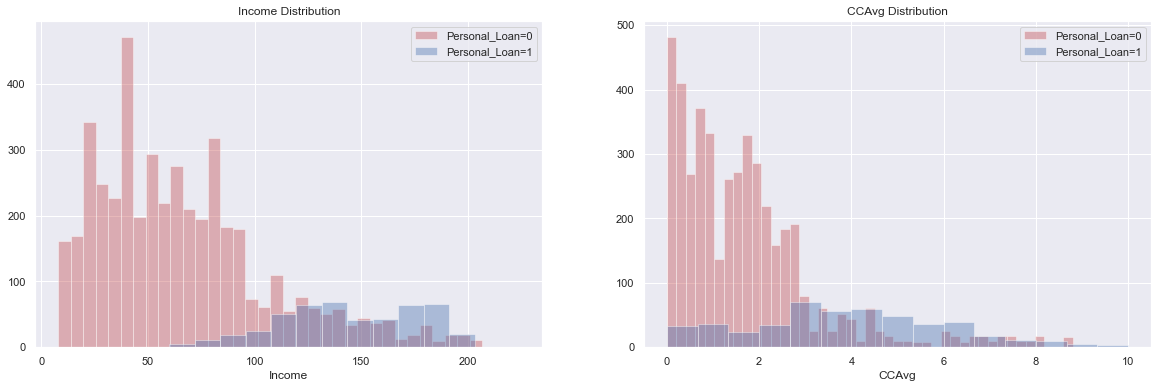

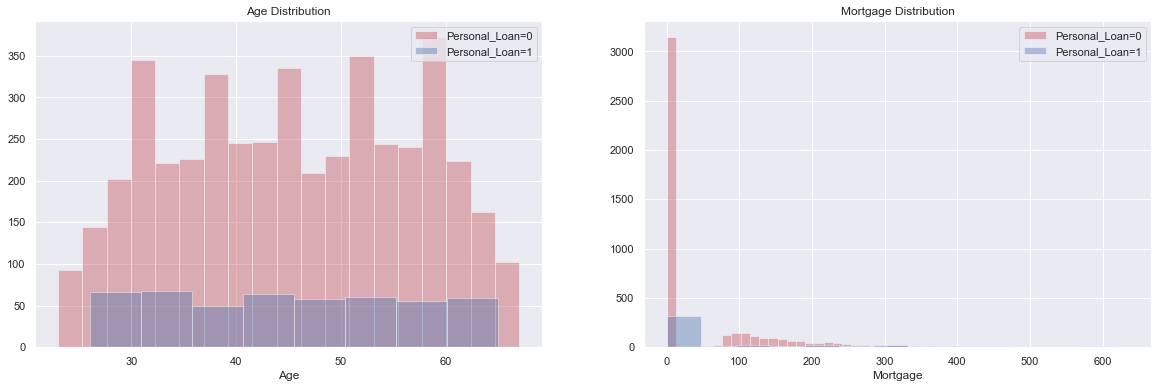

In [37]:
# Income Distribution Against Personal_Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(cdf[cdf["Personal_Loan"] == 0]['Income'], color = 'r',label='Personal_Loan=0',kde=False)
sns.distplot(cdf[cdf["Personal_Loan"] == 1]['Income'], color = 'b',label='Personal_Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

## CCAvg Distribution against Personal_Loan
plt.subplot(1, 2, 2)
sns.distplot(cdf[cdf["Personal_Loan"] == 0]['CCAvg'], color = 'r',label='Personal_Loan=0',kde=False)
sns.distplot(cdf[cdf["Personal_Loan"] == 1]['CCAvg'], color = 'b',label='Personal_Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

# Age Distribution against Personal_Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot(cdf[cdf["Personal_Loan"] == 0]['Age'], color = 'r',label='Personal_Loan=0',kde=False)
sns.distplot(cdf[cdf["Personal_Loan"] == 1]['Age'], color = 'b',label='Personal_Loan=1',kde=False)
plt.legend()
plt.title("Age Distribution")

# Mortgage Distribution against Personal_Loan
plt.subplot(1, 2, 2)
sns.distplot(cdf[cdf["Personal_Loan"] == 0]['Mortgage'], color = 'r',label='Personal_Loan=0',kde=False)
sns.distplot(cdf[cdf["Personal_Loan"] == 1]['Mortgage'], color = 'b',label='Personal_Loan=1',kde=False)
plt.legend()
plt.title("Mortgage Distribution")

In [38]:
print('Income of Non-Loan customers: ',
      cdf[cdf["Personal_Loan"] == 0]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('Income of Loan customers    : ', 
      cdf[cdf["Personal_Loan"] == 1]['Income'].median()*1000) #(multiply income by 1000 since its been mentioned in the data as $000)
print('\n')
print('Credit card spending of Non-Loan customers: ',
      cdf[cdf["Personal_Loan"] == 0]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('Credit card spending of Loan customers    : ', 
      cdf[cdf["Personal_Loan"] == 1]['CCAvg'].median()*1000) #(multiply CCAvg by 1000 since its been mentioned in the data as $000)
print('\n')
print('Age of Non-Loan customers: ',
      cdf[cdf["Personal_Loan"] == 0]['Age'].median())
print('Age of Loan customers    : ', 
      cdf[cdf["Personal_Loan"] == 1]['Age'].median())
print('\n')
print('Mortgage of Non-Loan customers: ',
      cdf[cdf["Personal_Loan"] == 0]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)
print('Mortgage of Loan customers    : ', 
      cdf[cdf["Personal_Loan"] == 1]['Mortgage'].mean()*1000) #(multiply Mortgage by 1000 since its been mentioned in the data as $000)

Income of Non-Loan customers:  59000.0
Income of Loan customers    :  142500.0


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Age of Non-Loan customers:  45.0
Age of Loan customers    :  45.0


Mortgage of Non-Loan customers:  51789.38053097345
Mortgage of Loan customers    :  100845.83333333333


**Observation :**
 * The graph shows the income of people with Personal_Loan is higher.
 * The graph show persons who have Personal_Loan have a higher credit card average. 
 * The graph shows the age has no influence on Personal_Loan.
 * The graph shows the mortgage of people with Personal_Loan is higher.

####  Distribution of Categorical variables against Personal_Loan

Text(0.5, 1.0, 'CD_Account Countplot')

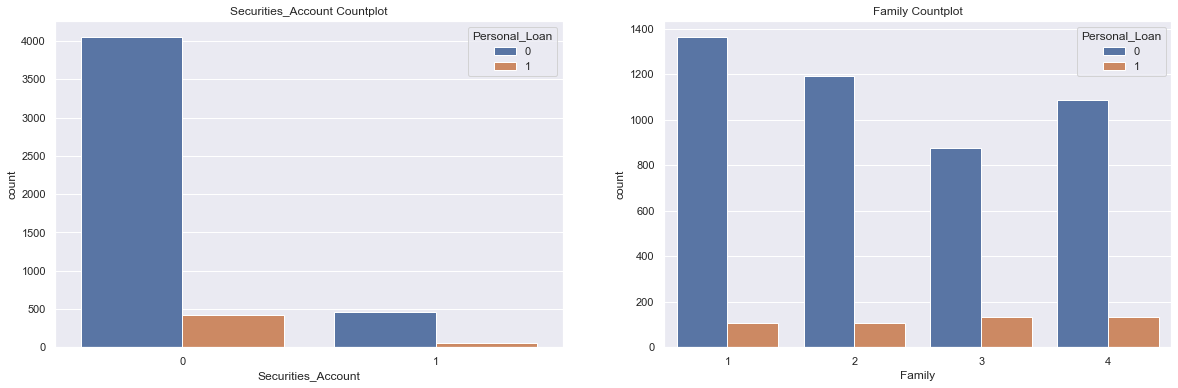

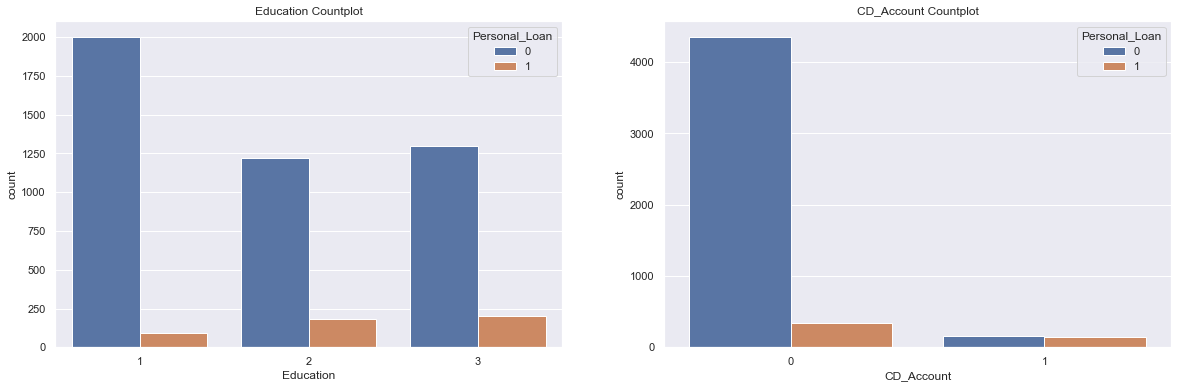

In [39]:
#Securities_Account
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Securities_Account',data=cdf,hue='Personal_Loan')
plt.title("Securities_Account Countplot")

#Family Size
plt.subplot(1, 2, 2)
sns.countplot(x='Family',data=cdf,hue='Personal_Loan')
plt.title("Family Countplot")

#Education
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Education',data=cdf,hue='Personal_Loan')
plt.title("Education Countplot")

#CD_Account
plt.subplot(1, 2, 2)
sns.countplot(x='CD_Account',data=cdf,hue='Personal_Loan')
plt.title("CD_Account Countplot")

**Observation :** 
 * Majority of customers who does not have loan have securities account
 * Family size does not have any impact in Personal_Loan.
 * It seems families with size of 3 are more likely to take loan.
 * Education does not have any impact in Personal_Loan. 
 * Customers who does not have CD account , does not have loan as well.  
 * All customers who has CD account has loan as well

#### Influence of income and education on Personal_Loan

Text(0.5, 1.0, 'Income and Education Boxplot')

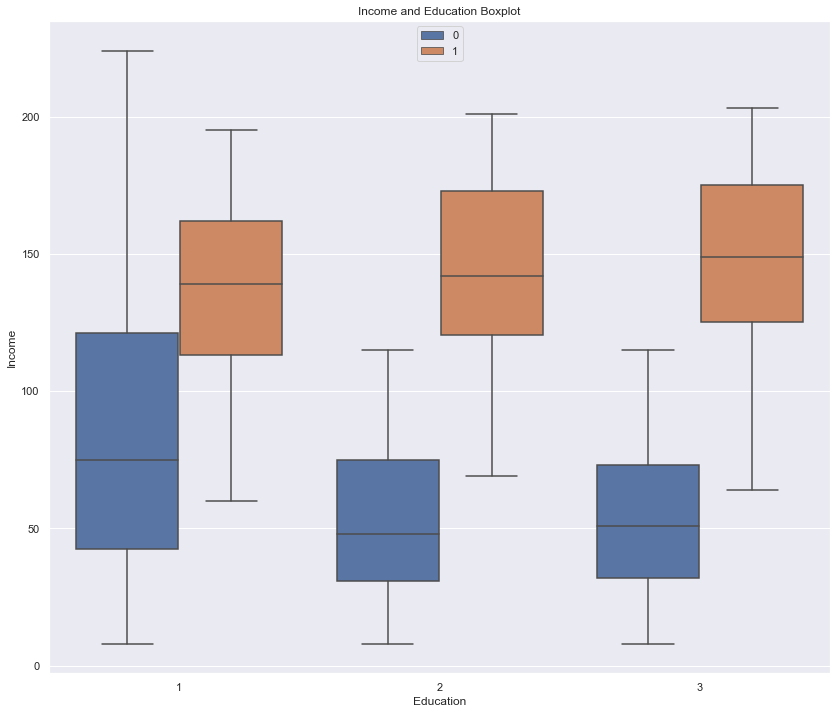

In [40]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=cdf)
plt.legend(loc='upper center')
plt.title("Income and Education Boxplot")

**Observation :** 
Customers whose education level is 1 is having more income. 

#### Influence of mortgage and education on Personal_Loan

Text(0.5, 1.0, 'Mortgage and Education Boxplot')

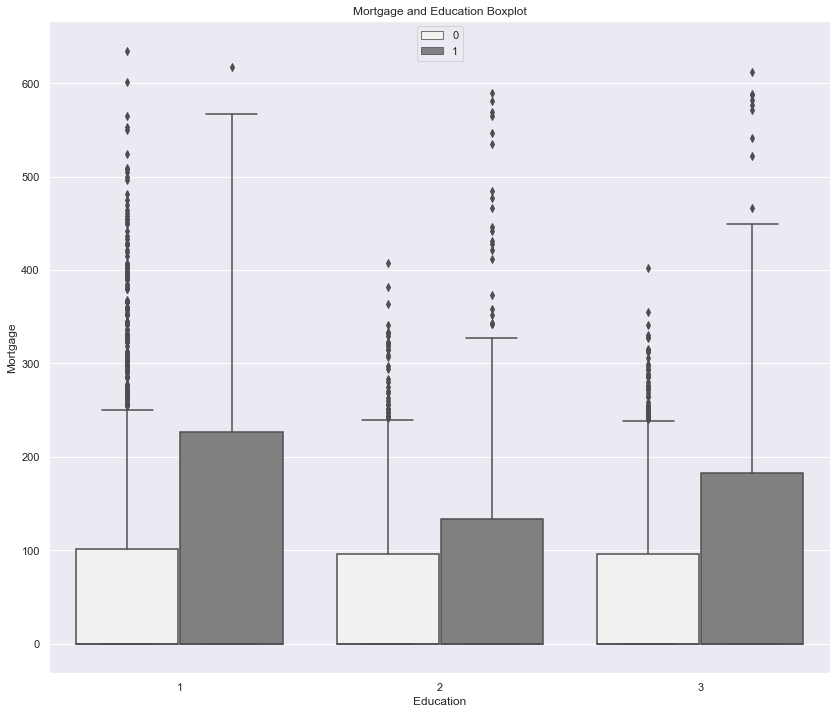

In [41]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=cdf,color='grey')
plt.legend(loc='upper center')
plt.title("Mortgage and Education Boxplot")

**Observation :** 
Value of house mortagage for the non-applicants is much lower than that of applicants. 

### Influence of income and family on Personal_Loan

Text(0.5, 1.0, 'Family and Income Boxplot')

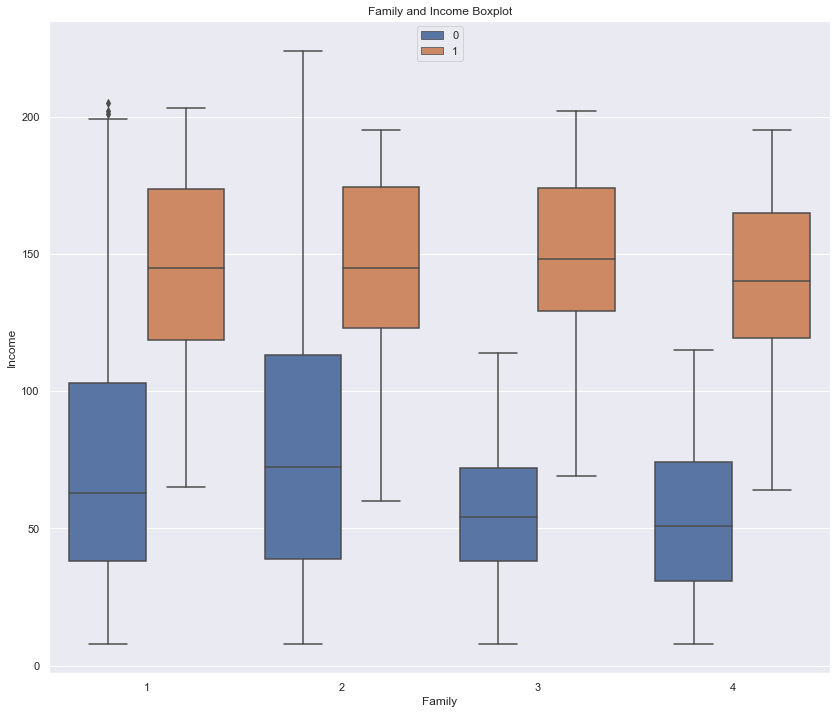

In [42]:
sns.boxplot(x="Family", y="Income", hue="Personal_Loan", data=cdf)
plt.legend(loc='upper center')
plt.title("Family and Income Boxplot")

**Observation :** 
It seems families with income less than 100K are less likely to take loan,than families with high income.

# Logistic Regression

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [44]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Split Train and Test Data

We will use 70% of data for training and 30% for testing.

In [45]:
X = cdf.drop(["ID","ZIPCode","Personal_Loan","experience_range","age_range","income_range"],axis=1)
Y = cdf["Personal_Loan"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
4966,41.0,17.0,34.0,1,0.7,1,143.0,0,0,0,0
4086,50.0,26.0,11.0,4,0.2,1,0.0,1,0,0,0
2881,49.0,25.0,55.0,4,0.1,3,0.0,0,0,1,0
1237,38.0,13.0,169.0,1,6.8,3,0.0,0,1,1,1
1429,31.0,5.0,35.0,1,0.6,3,171.0,0,0,0,0


## Verify split data

In [47]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cdf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(cdf.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [48]:
y_train.value_counts()

0    3178
1     322
Name: Personal_Loan, dtype: int64

## Build Logistic Regression

In [49]:
#Build the logistic regression model
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(x_train, y_train)

## Check the coefficients

In [50]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Age,-1.38e-02
Experience,3.30e-02
Income,5.62e-02
Family,6.79e-01
CCAvg,1.17e-01
Education,1.81e+00
Mortgage,7.51e-04
Securities_Account,-3.73e-01
CD_Account,2.99e+00
Online,-8.45e-01


## Convert Coefficient to Odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [51]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,0.99,1.03,1.06,1.97,1.12,6.09,1.00,0.69,19.86,0.43,0.48
Change_odd%,-1.37,3.35,5.78,97.24,12.40,508.71,0.08,-31.17,1885.66,-57.05,-52.14


## Confusion Matrix : Training data

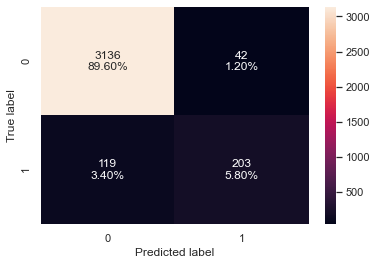

In [52]:
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train)

In [53]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95,0.63,0.83,0.72


## Confusion Matrix : Test data

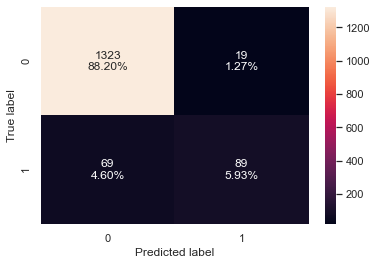

In [54]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test)

In [55]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.94,0.56,0.82,0.67


## ROC Curve for Logistic Regression

### ROC on train data

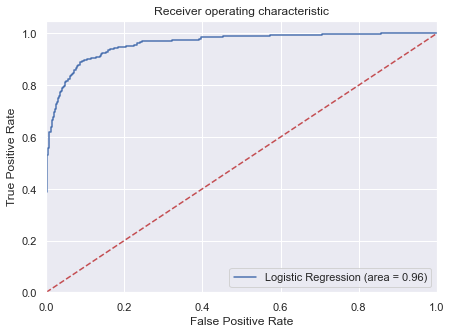

In [56]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


### ROC on Test data

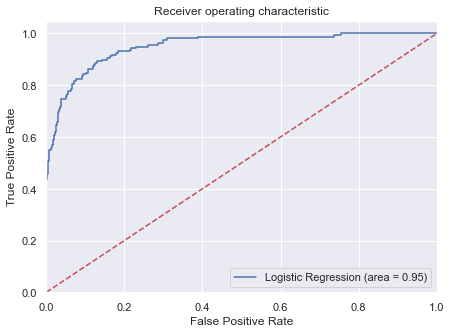

In [57]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Optimal threshold as per AUC-ROC curve

In [58]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.12337709003999904


## Confusion Matrix : Training data : Threshold as 0.102

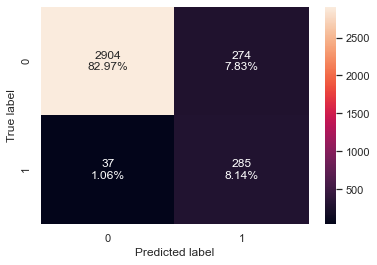

In [59]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_auc_roc
)

## Check performance : Train data (threshold as 0.1)

In [60]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, x_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.91,0.89,0.51,0.65


## Confusion Matrix : Test data : Threshold as 0.1

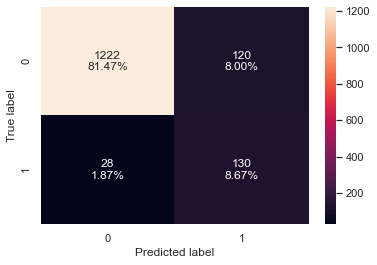

In [61]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_auc_roc
)

## Check performance : Test data (threshold as 0.1)

In [62]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, x_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.9,0.82,0.52,0.64


## Set threhold to 0.2
- Visualize confusion matrix for training data
- Check performance of training data

- Visualize confusion matrix for test data
- Check- Visualize confusion matrix for test data


In [63]:
# setting the threshold
optimal_threshold_curve = 0.2

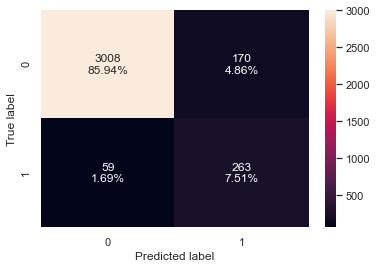

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_curve
)

In [65]:
log_reg_model_train_perf_threshold_curve1 = (
    model_performance_classification_sklearn_with_threshold(
        lg, x_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve1

Training performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.82,0.61,0.7


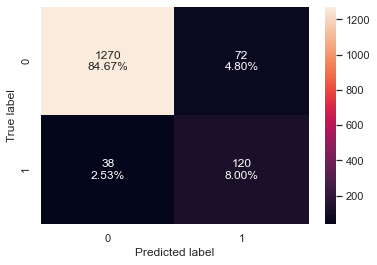

In [66]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)

In [67]:
log_reg_model_test_perf_threshold_curve1 = (
    model_performance_classification_sklearn_with_threshold(
        lg, x_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve1

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.76,0.62,0.69


## Observation from threshold
- Changing of threshold from 0.102 to 0.2 , recall decreased and precision increased
- Threshold with 0.102 is much better with better recall

# Decision Trees

## Import Decision Trees libraries

In [68]:
# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

## Function to calculate recall score

In [69]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

## Function : make_confusion_matrix plot confusion matrix

In [70]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree model (No pre/post pruning)

In [71]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [72]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Initial Confusion Matrix : Train data

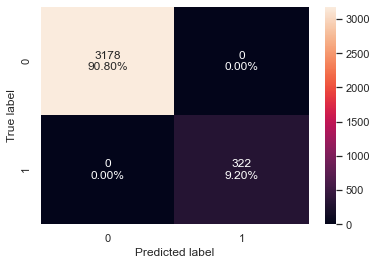

In [73]:
confusion_matrix_sklearn(model, x_train, y_train)

### Model performance : Train data

In [74]:
decision_tree_perf_train = get_recall_score(model, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)



Recall Score: 1.0


### Initial Confusion Matrix : Test data

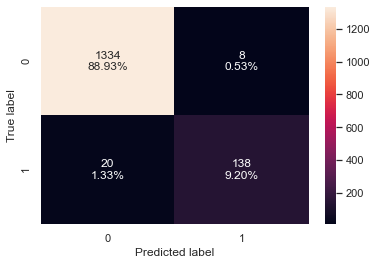

In [75]:
confusion_matrix_sklearn(model, x_test, y_test)

### Model Performance : Test data (No pruning technique)

In [76]:
dc_perf_test = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test)

print("Test performance:")
dc_perf_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.98,0.87,0.95,0.91


In [77]:
## creating a list of column names
feature_names = x_train.columns.to_list()

### Visualize Decision Tree : Without Pre or Post prunning

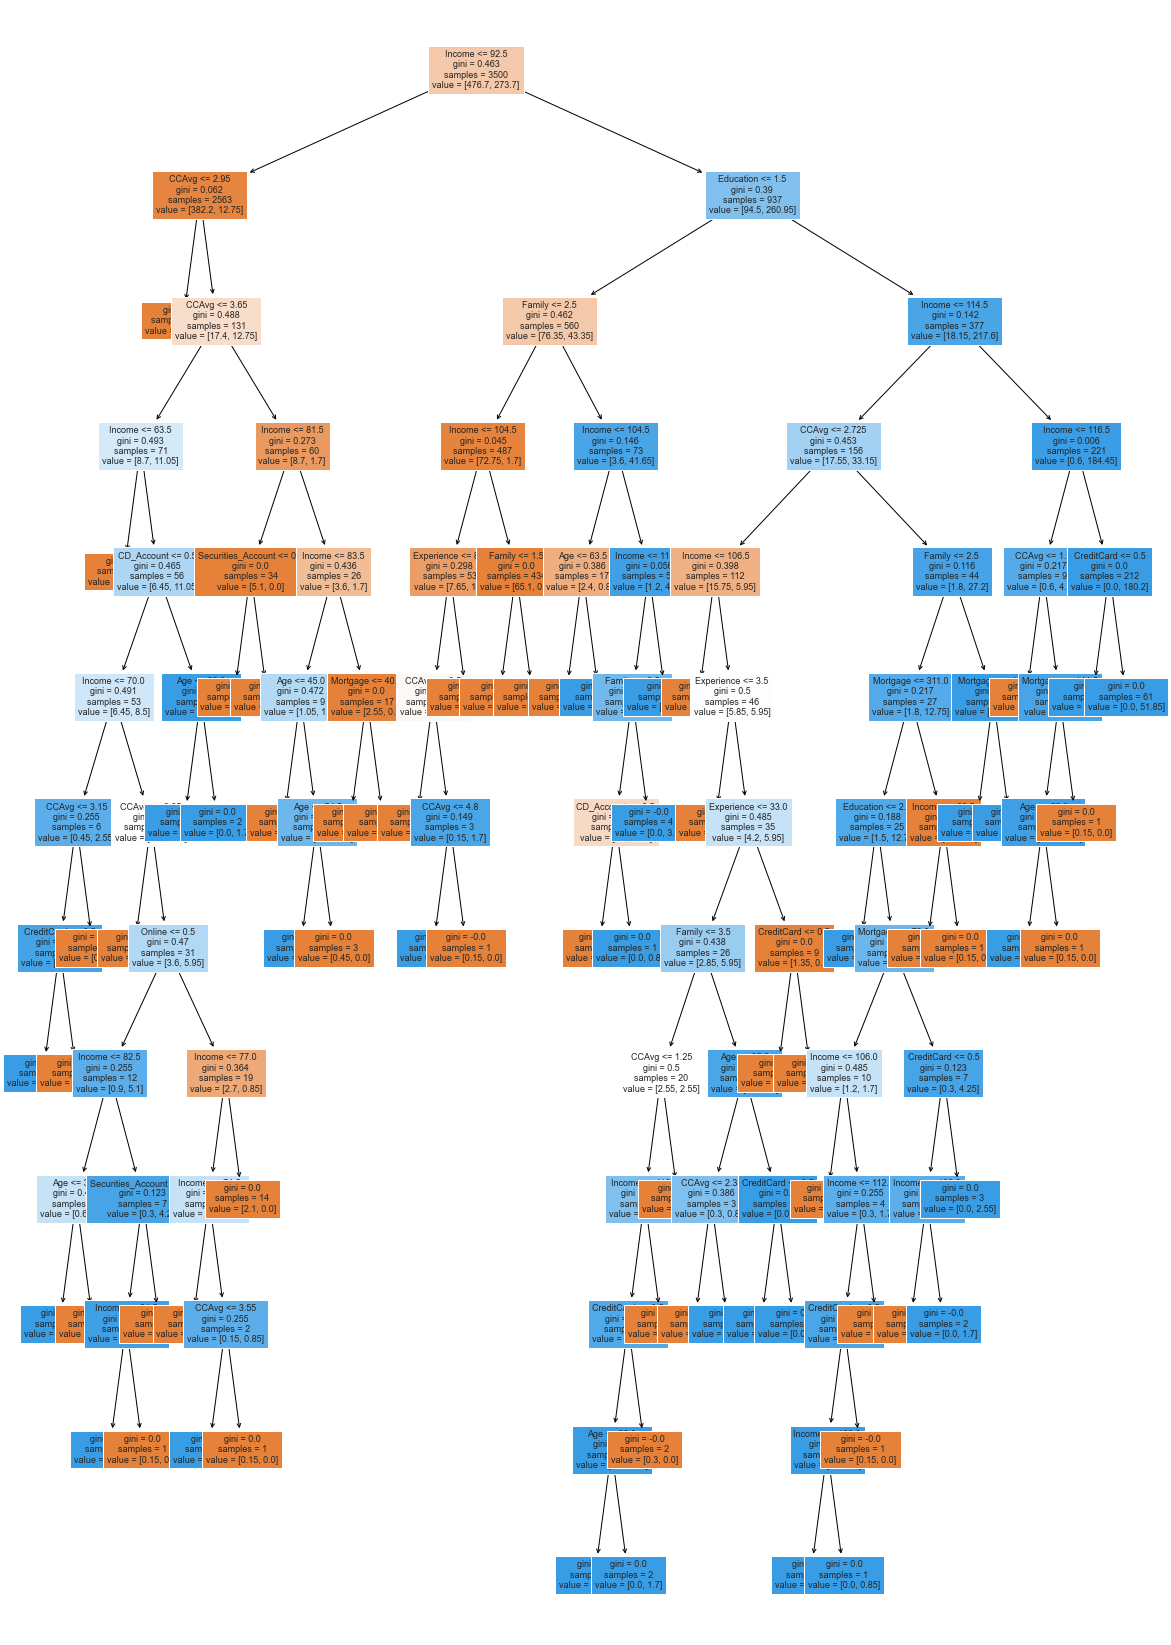

In [78]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Rules of Decision Tree : Without Pre or Post Pruning

In [79]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [364.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.65
|   |   |   |--- Income <= 63.50
|   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |--- Income >  63.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- Income <= 70.00
|   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |--- CreditCard <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |   |   |--- CreditCard >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.15
|   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |--- Income >  70.00
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   

### Importance of features in decision tree

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              5.99e-01
Education           1.44e-01
Family              1.36e-01
CCAvg               8.39e-02
Age                 1.05e-02
Experience          8.85e-03
CD_Account          5.19e-03
Online              4.78e-03
Mortgage            3.36e-03
CreditCard          3.30e-03
Securities_Account  7.78e-04


### Visualize feature importance (without Pre/Post prunning)

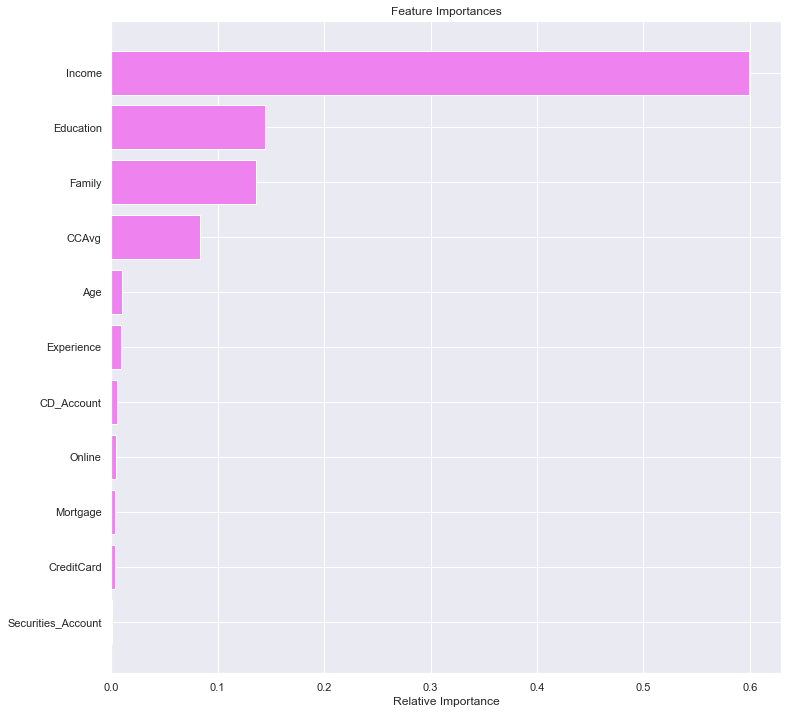

In [81]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation : Decision Tree (No Pruning)
- Income is most important feature
- Education and family are also important 
- Almost 9 features are contributing and showing important features 

## Reducing over fitting (Pre-Pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [82]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

### Confusion Matrix : Train data

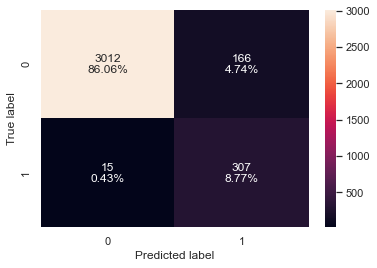

In [83]:
confusion_matrix_sklearn(estimator, x_train, y_train)

### Recall score : Train data 

In [84]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.953416149068323


### Confusion Matrix : Test data

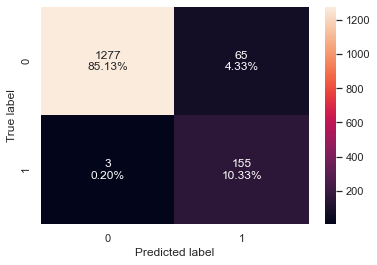

In [85]:
confusion_matrix_sklearn(estimator, x_test, y_test)

### Model Performance : Test data (Pre-pruning)

In [86]:
dc_perf_test1 = model_performance_classification_sklearn_with_threshold(
    estimator, x_test, y_test
)

print("Test performance:")
dc_perf_test1

Test performance:


,Accuracy,Recall,Precision,F1
0,0.95,0.98,0.7,0.82


### Visualize Tree (Pre-Pruning)

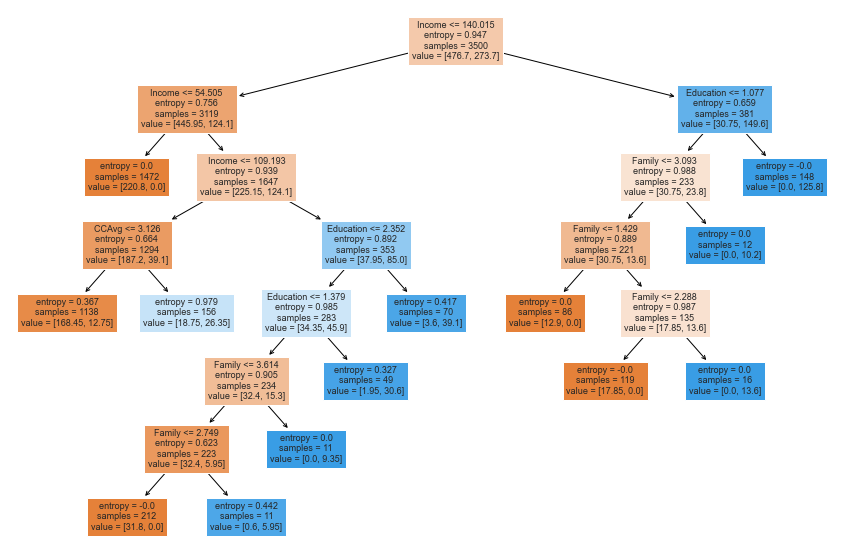

In [87]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Rules of Decision Tree : With Pre Pruning

In [88]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 140.01
|   |--- Income <= 54.50
|   |   |--- weights: [220.80, 0.00] class: 0
|   |--- Income >  54.50
|   |   |--- Income <= 109.19
|   |   |   |--- CCAvg <= 3.13
|   |   |   |   |--- weights: [168.45, 12.75] class: 0
|   |   |   |--- CCAvg >  3.13
|   |   |   |   |--- weights: [18.75, 26.35] class: 1
|   |   |--- Income >  109.19
|   |   |   |--- Education <= 2.35
|   |   |   |   |--- Education <= 1.38
|   |   |   |   |   |--- Family <= 3.61
|   |   |   |   |   |   |--- Family <= 2.75
|   |   |   |   |   |   |   |--- weights: [31.80, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  2.75
|   |   |   |   |   |   |   |--- weights: [0.60, 5.95] class: 1
|   |   |   |   |   |--- Family >  3.61
|   |   |   |   |   |   |--- weights: [0.00, 9.35] class: 1
|   |   |   |   |--- Education >  1.38
|   |   |   |   |   |--- weights: [1.95, 30.60] class: 1
|   |   |   |--- Education >  2.35
|   |   |   |   |--- weights: [3.60, 39.10] class: 1
|--- Income >  140.01
|   |--- Educa

### Importance of features in decision tree (with pre-pruning)

In [89]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                     Imp
Income              0.58
Education           0.18
Family              0.17
CCAvg               0.07
Age                 0.00
Experience          0.00
Mortgage            0.00
Securities_Account  0.00
CD_Account          0.00
Online              0.00
CreditCard          0.00


### Visualize feature importance (with pre-pruning)

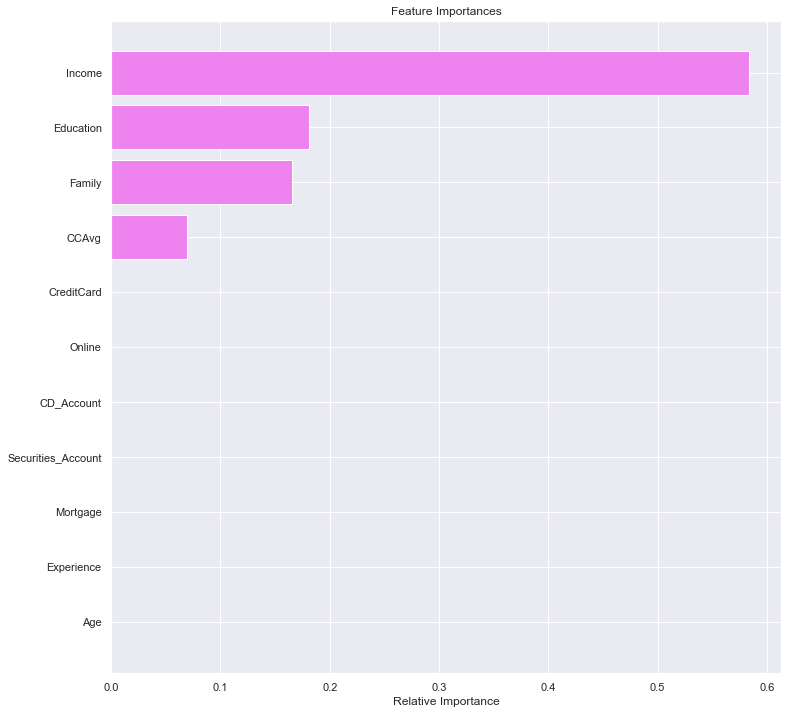

In [90]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation : Decision Tree (Pre-Pruning)
- Income is most important feature
- Education and family are also important 
- After pre-pruning - still, we have 6 features contribute to the model

## Decision Tree : Post Pruning 

In [91]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [92]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00e+00,-3.26e-15
1,7.55e-19,-3.26e-15
2,7.55e-19,-3.26e-15
3,7.55e-19,-3.26e-15
4,2.35e-18,-3.26e-15
5,4.53e-18,-3.25e-15
6,5.28e-18,-3.25e-15
7,7.55e-18,-3.24e-15
8,9.39e-18,-3.23e-15
9,1.07e-17,-3.22e-15


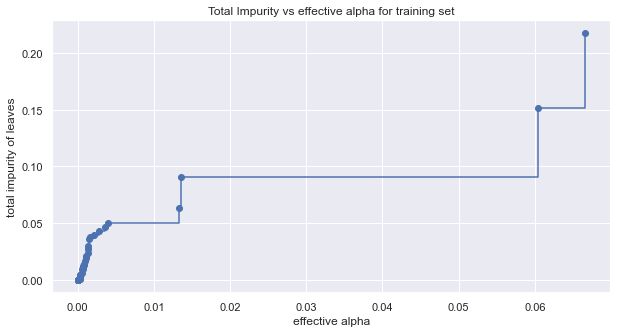

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [94]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24561934512178848


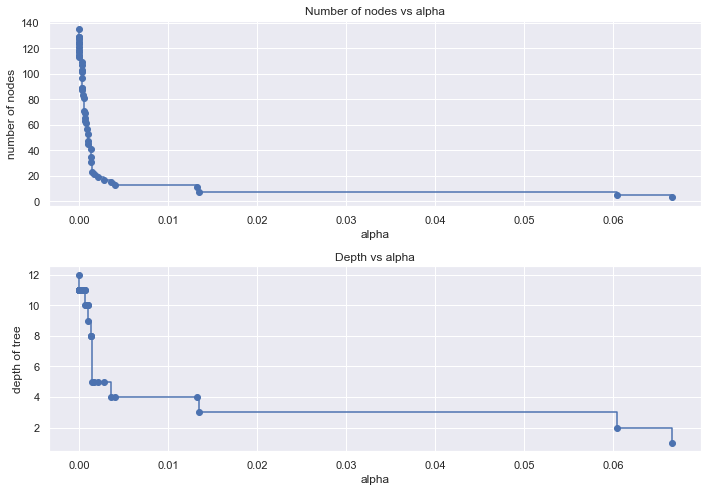

In [95]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [96]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [97]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [98]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

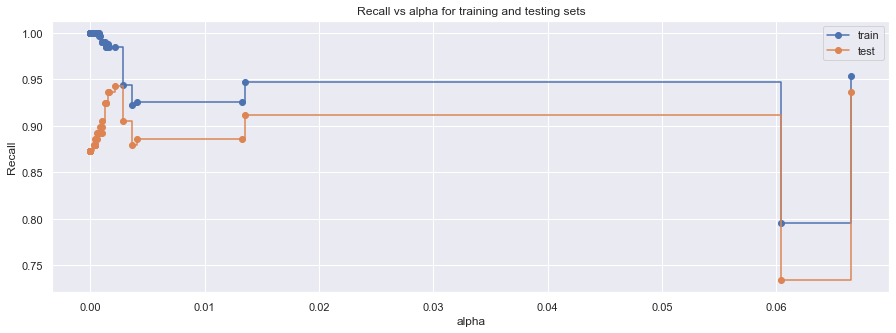

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Creating the model where we get highest train and test recall

In [100]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002118551841670138,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [101]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002118551841670138,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Confusion Matrix : Train data

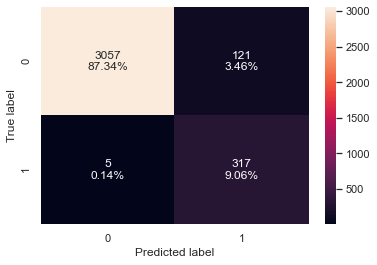

In [102]:
confusion_matrix_sklearn(best_model, x_train, y_train)

### Recall for train data

In [103]:
print("Recall Score:", get_recall_score(best_model, x_train, y_train))

Recall Score: 0.984472049689441


### Confusion Matrix : Test data

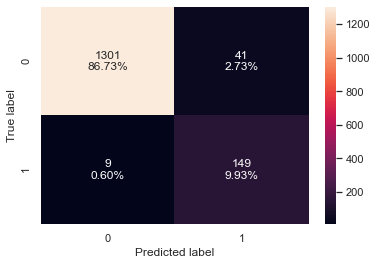

In [104]:
confusion_matrix_sklearn(best_model, x_test, y_test)

### Model performance for test data (Post pruning)

In [105]:
dc_perf_test2 = model_performance_classification_sklearn_with_threshold(
    best_model, x_test, y_test
)

print("Test performance:")
dc_perf_test2

Test performance:


,Accuracy,Recall,Precision,F1
0,0.97,0.94,0.78,0.86


### Visualize Decision Tree

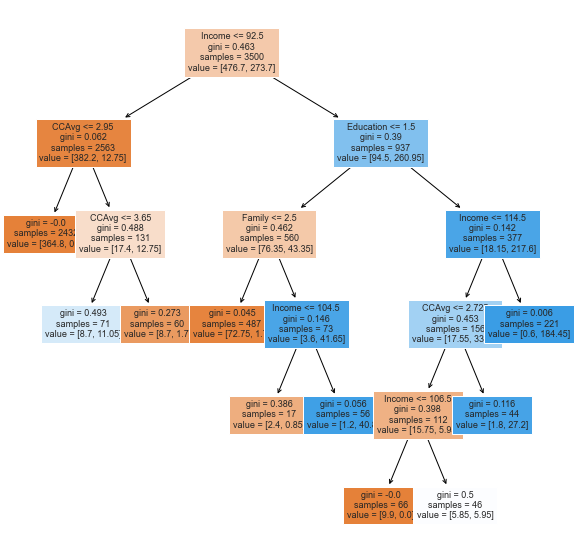

In [106]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Get model using ccp_alpha = 0.002

In [107]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

#### Confusion Matrix : Train data

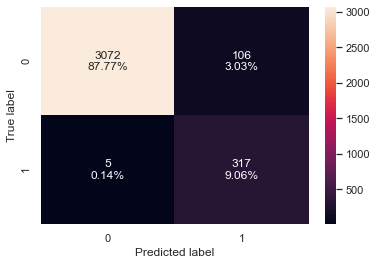

In [108]:
confusion_matrix_sklearn(best_model2, x_train, y_train)

In [109]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, x_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.984472049689441


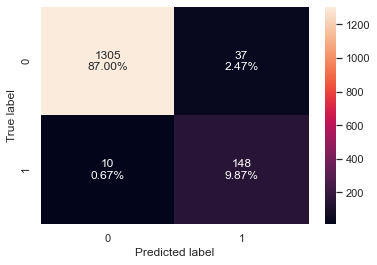

In [110]:
confusion_matrix_sklearn(best_model2, x_test, y_test)

In [111]:
dc_perf3 = model_performance_classification_sklearn_with_threshold(
    best_model2, x_train, y_train
)

print("Test performance:")
dc_perf3

Test performance:


,Accuracy,Recall,Precision,F1
0,0.97,0.98,0.75,0.85


### Visualize Decision Tree : Post pruning data

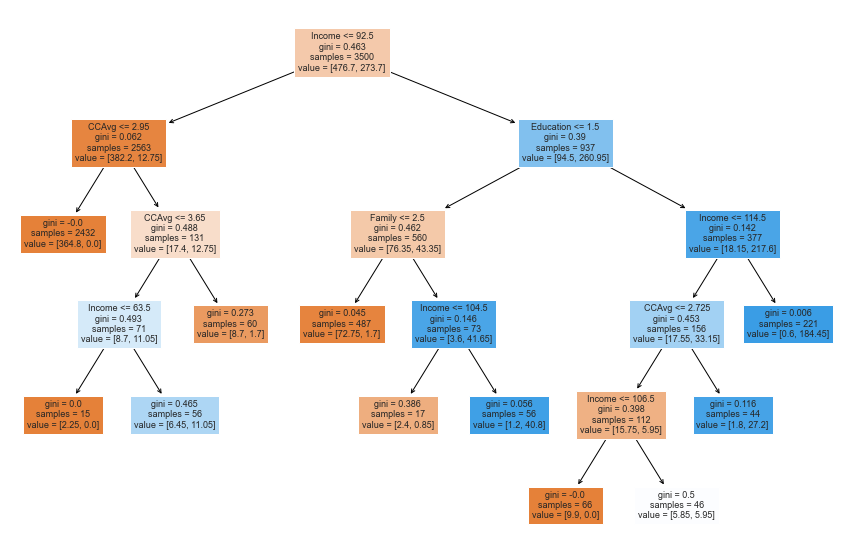

In [112]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Rules of Decision Tree : With Post-pruning

In [113]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [364.80, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.65
|   |   |   |--- Income <= 63.50
|   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |--- Income >  63.50
|   |   |   |   |--- weights: [6.45, 11.05] class: 1
|   |   |--- CCAvg >  3.65
|   |   |   |--- weights: [8.70, 1.70] class: 0
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [72.75, 1.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- weights: [2.40, 0.85] class: 0
|   |   |   |--- Income >  104.50
|   |   |   |   |--- weights: [1.20, 40.80] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.73
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [9.90, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [5.85, 5.95] class: 1
|   |   |   

### Importance of features in decision tree : Post Pruning

In [114]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                     Imp
Income              0.63
Education           0.16
Family              0.14
CCAvg               0.07
Age                 0.00
Experience          0.00
Mortgage            0.00
Securities_Account  0.00
CD_Account          0.00
Online              0.00
CreditCard          0.00


### Visualize feature importance (with Post-pruning)

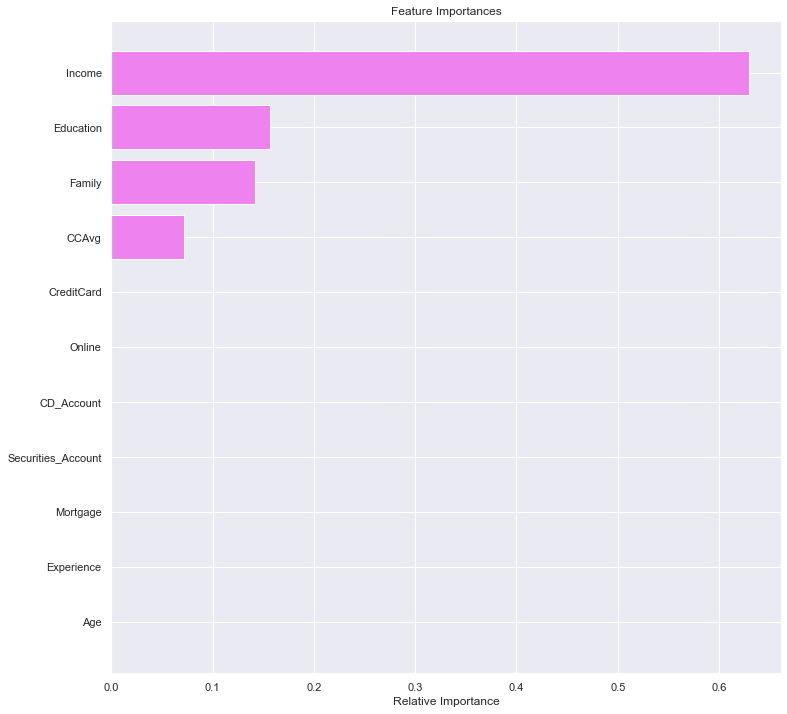

In [115]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation : Decision Tree (Post-Pruning)
- Income is most important feature
- Education , family and CCAvg are also important 

# Model Comparison on Test data

## Represent all Model performance on test data in Dataframe

In [132]:
from IPython.display import display
pd.options.display.float_format = '{:,.3f}'.format

df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision' ,'Recall','F1_score'])

df = df.append({'Model' : 'Logistic Regression (no Threshold)', 'Accuracy' : log_reg_model_test_perf.iloc[0]['Accuracy'], 'Recall' : log_reg_model_test_perf.iloc[0]['Recall'] ,'Precision' : log_reg_model_test_perf.iloc[0]['Precision'] , 'F1_score' : log_reg_model_test_perf.iloc[0]['F1'] }, 
                ignore_index = True) 
df = df.append({'Model' : 'Logistic Regression (Threshold 0.1)', 'Accuracy' : log_reg_model_test_perf_threshold_auc_roc.iloc[0]['Accuracy'], 'Recall' : log_reg_model_test_perf_threshold_auc_roc.iloc[0]['Recall'] ,'Precision' : log_reg_model_test_perf_threshold_auc_roc.iloc[0]['Precision'] , 'F1_score' : log_reg_model_test_perf_threshold_auc_roc.iloc[0]['F1'] }, 
                ignore_index = True)
df = df.append({'Model' : 'Logistic Regression (Threshold 0.2)', 'Accuracy' : log_reg_model_test_perf_threshold_curve1.iloc[0]['Accuracy'], 'Recall' : log_reg_model_test_perf_threshold_curve1.iloc[0]['Recall'] ,'Precision' : log_reg_model_test_perf_threshold_curve1.iloc[0]['Precision'] , 'F1_score' : log_reg_model_test_perf_threshold_curve1.iloc[0]['F1'] }, 
                ignore_index = True) 
df = df.append({'Model' : 'Decision Tree (No pruning)', 'Accuracy' : dc_perf_test.iloc[0]['Accuracy'], 'Recall' : dc_perf_test.iloc[0]['Recall'] ,'Precision' : dc_perf_test.iloc[0]['Precision'] , 'F1_score' : dc_perf_test.iloc[0]['F1'] }, 
                ignore_index = True)
df = df.append({'Model' : 'Decision Tree (Pre pruning)', 'Accuracy' : dc_perf_test1.iloc[0]['Accuracy'], 'Recall' : dc_perf_test1.iloc[0]['Recall'] ,'Precision' : dc_perf_test1.iloc[0]['Precision'] , 'F1_score' : dc_perf_test1.iloc[0]['F1'] }, 
                ignore_index = True)
df = df.append({'Model' : 'Decision Tree (Post pruning)', 'Accuracy' : dc_perf_test2.iloc[0]['Accuracy'], 'Recall' : dc_perf_test2.iloc[0]['Recall'] ,'Precision' : dc_perf_test2.iloc[0]['Precision'] , 'F1_score' : dc_perf_test2.iloc[0]['F1'] }, 
                ignore_index = True)
df


,Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression (no Threshold),0.941,0.824,0.563,0.669
1,Logistic Regression (Threshold 0.1),0.901,0.520,0.823,0.637
2,Logistic Regression (Threshold 0.2),0.927,0.625,0.759,0.686
3,Decision Tree (No pruning),0.981,0.945,0.873,0.908
4,Decision Tree (Pre pruning),0.955,0.705,0.981,0.820
5,Decision Tree (Post pruning),0.967,0.784,0.943,0.856


## Best model with better recall & f1 score

- **Precision** : Tells us the cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.
- **Recall** :  Tells us the cases where actually the personal loan was accepted by the customer but we predicted it as not accepted.

**In our case, it would be <span style="color:blue">recall that would hold more importance than precision<span style="color:blue">. 
So choosing recall and f1-score would be best evaluation metric.**

In [144]:
# Get the column name to list
cols = df.columns.tolist()

# reorder the column list
df = df[['Model', 'Recall', 'F1_score', 'Accuracy', 'Precision']]

# Fill the values in cols 
cols = list(df.columns.values)

# redefine the dataframe with correct order of column and corresponding values
df = df[cols]

# Sort the data in desc order with recall , f1 score
df.sort_values(by=['Recall', 'F1_score'],ascending=False)



,Model,Recall,F1_score,Accuracy,Precision
4,Decision Tree (Pre pruning),0.981,0.820,0.955,0.705
5,Decision Tree (Post pruning),0.943,0.856,0.967,0.784
3,Decision Tree (No pruning),0.873,0.908,0.981,0.945
1,Logistic Regression (Threshold 0.1),0.823,0.637,0.901,0.520
2,Logistic Regression (Threshold 0.2),0.759,0.686,0.927,0.625
0,Logistic Regression (no Threshold),0.563,0.669,0.941,0.824


**  We observe the best model as <span style="color:blue">Decision Tree Pre pruning method</span> with better recall and f1 score

# Overall Insights & Observation

## Insights :  From initial EDA and after correcting impurity

- Income of people with Personal_Loan is higher.
- Persons who have Personal_Loan have a higher credit card average. 
- Age has no influence on Personal_Loan.
- People with mortgage with Personal_Loan is higher.
- Majority of customers who does not have loan have securities account
- Family size does not have any impact in Personal_Loan.
- It seems families with size of 3 are more likely to take loan.
- Education does not have any impact in Personal_Loan. 
- Customers who does not have CD account , does not have loan as well.  
- All customers who has CD account has loan as well
- Value of house mortagage for the non-applicants is much lower than that of applicants. 
- It seems families with income less than 100K are less likely to take loan,than families with high income.

## Insights : Logistic Regression - No threshold
- Accuracy was high but had very low recall and F1 score
- It indicated that logistic regression without threhold limit is weak model

## Insights : Logistic Regression - threhold as 0.102 & 0.2
- Changing of threshold from 0.102 to 0.2 , recall decreased and precision increased
- Threshold with 0.102 is much better with better recall and accuracy as compared to other Logisctic regression


## Insights :  Decision Tree - No pruning
- Income is most important feature
- Education and family are also important 
- Almost 9 features are contributing and showing important features 

## Insights :  Decision Tree - Pre-Pruning
- Grid search is used as tuning technique that attempts to compute the optimum values of hyperparameters.
- Income is most important feature
- Education and family are also important


## Insights :  Decision Tree - Post-Pruning
- Grid search is used as tuning technique that attempts to compute the optimum values of hyperparameters.
- Income is most important feature
- Education and family are also important
- With ccp_alpha = 0.002 , model accuracy , recall and f1 score are much better than other models
- After post-pruning , only 4 features contribute to the model and is much better model




# Recommendation for models


## Choosing between Precision & Recall
- **Precision** : Tells us the cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.
- **Recall** :  Tells us the cases where actually the personal loan was accepted by the customer but we predicted it as not accepted.

**In our case, it would be <span style="color:blue">recall that would hold more importance than precision<span style="color:blue">. 
So choosing recall and f1-score would be best evaluation metric.**

## Recommendation based on our model evaluation
- As compared with all the models, <span style="color:blue">**Decision Tree - Pre pruning process with ccp_alpha as 0.002** </span>serves better model with good recall and f1 score.

**Additional pointers for banks to target customers**
- People will more income tends to take loan - Bank can make them the target as a premium customer who can repay loan to bank faster. This will benefit the bank as well
- Generally people with more education tends to know more about loan. Bank can also target people having higher education level
